In [1]:
#@title
### EP2 MAC0417/MAC5768
##################################################################
# AO PREENCHER ESSE CABEÇALHO COM O MEU NOME E O MEU NÚMEROUSP,  #
# DECLARO QUE SOU O ÚNICO AUTORE RESPONSÁVEL PELA RESOLUÇÃO      #
# DESTE EP.                                                      #
# TODAS AS PARTES FORAM DESENVOLVIDAS E IMPLEMENTADAS POR MIM,   #
# SEGUINDO AS INSTRUÇÕES E QUE PORTANTO, NÃO CONSTITUEM          #
# DESONESTIDADE ACADÊMICA OU PLÁGIO.                             #
#                                                                #
# DECLARO TAMBÉM, QUE SOU RESPONSÁVEL POR TODAS AS CÓPIAS        #
# DESSE PROGRAMA, E QUE EU NÃO DISTRIBUI OU FACILITEI A          #
# SUA DISTRIBUIÇÃO. ESTOU CIENTE QUE OS CASOS DE PLÁGIO E        #
# DESONESTIDADE ACADÊMICA SERÃO TRATADOS SEGUNDO OS CRITÉRIOS    #
# DEFINIDOS NO CÓDIGO DE ÉTICA DA USP.                           #
#                                                                # 
# ENTENDO QUE JUPYTER NOTEBOOKS SEM ASSINATURA NÃO SERÃO         #
# CORRIGIDOS E, AINDA ASSIM, PODERÃO SER PUNIDOS POR             #
# DESONESTIDADE ACADÊMICA.                                       #
#                                                                #
#                                                                #
# Nome: Luiz Gustavo Pina de Sales                               #
# NUSP: 10736991                                                 #
# Turma: 2024145                                                 #
# Prof.: Ronaldo Fumio Hashimoto                                 #
#################################################################

## Importações
Realiza as importações das bibliotecas necessárias para execução do notebook, de acordo com as permitidas para uso pelo enunciado.

In [25]:
pip install opencv-python


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
import cv2
from cv2 import resize, imwrite
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import numpy as np
import pandas
import os 

## Código principal para aquisição das imagens

No código abaixo temos um banco de imagens que irá conter um dicionário com a seguinte hierarquia de chaves:

    Classe -> Tempo -> Local -> Fundo -> Imagens

Todas as outras funções irão acessar as imagens através deste dicionário.
Este código foi adaptado do EP1 para permitir o uso com a nova estrutura do banco de imagens.

In [30]:
bancoImagensCinza = {}
bancoImagensProcessadas = {}
quantidadeClasses = 0
quantidadeImagens = 0
resolucaoImagens = ""

def loadImages(path, quantidadeClasses, quantidadeImagens, resolucaoImagens, bancoImagens):
    imagens = os.listdir(path)
    
    for imagem in imagens:
        metadata = imagem.split(",")
        if metadata[0] not in bancoImagens.keys():
            bancoImagens[metadata[0]] = {}
            
        currentLevel = bancoImagens[metadata[0]]
        for metadataIndex in range(1,len(metadata)-1):
            if(metadata[metadataIndex] not in currentLevel): 
                currentLevel[metadata[metadataIndex]] = {}
                currentLevel = currentLevel[metadata[metadataIndex]]
            else: currentLevel = currentLevel[metadata[metadataIndex]] 

        local = metadata[-1].strip().replace(".jpg", "")
        currentLevel[local] = imread(path+imagem)
        quantidadeImagens += 1
        resolucaoImagens = f"{len(currentLevel[local])}x{len(currentLevel[local][0])}"
    return quantidadeClasses, quantidadeImagens, resolucaoImagens   
    
loadImages("./originalGrayDataset/", quantidadeClasses, quantidadeImagens, resolucaoImagens, bancoImagensCinza)
loadImages("./augmentedDataset/", quantidadeClasses, quantidadeImagens, resolucaoImagens, bancoImagensProcessadas)

(0, 600, '960x1280')

## Save Image

Código com base na sugestão do enunciado.

In [33]:
def saveImage(filename, image):
    imwrite(filename, image)

## Funções de Equalização e Normalização de Histogramas

Aqui temos as funções que serão utilizadas para a aquisição dos histogramas das médias e equalização das imagens. 
As funções abaixo são baseadas nas desenvolvidas para a Lista 1.

In [65]:
#Código adaptado da Lista 1
def plot_img(fig, titulo):
  plt.figure(figsize=(3,3))
  plt.imshow(fig, cmap='gray', vmin=0, vmax=255)
  plt.title(titulo)
  plt.axis('off')
  plt.show()
    
def plot_histogram(fig, titulo):
  plt.figure(figsize=(5,5))
  plt.plot(fig)
  plt.title(titulo)
  plt.show()

def normalized_histogram(image, legenda):
    normalizedValues = [0]*256
    for lineIndex in range(len(image)):
        for columnIndex in range(len(image[lineIndex])):
            normalizedValues[int(image[lineIndex][columnIndex])] +=1
            
    for i in range(len(normalizedValues)): 
        normalizedValues[i] /= (len(image)*len(image[0]))
    plot_histogram(normalizedValues, "Histograma normalizado da imagem:\n " + legenda)
    
    return normalizedValues
    
def histogram_equalization(originalImage, normalizedValues, legenda):
    image = originalImage.copy()
    plot_img(originalImage, "Antes da equalização da imagem:\n " + legenda)
    for lineIndex in range(len(image)):
        for columnIndex in range(len(image[lineIndex])):
            normalizedSum = 0
            for value in range(int(image[lineIndex][columnIndex])): normalizedSum += normalizedValues[value]
            image[lineIndex][columnIndex] = 255*(normalizedSum)
    plot_img(image, "Depois da normalização da imagem:\n " + legenda)
    return image

## Histograma Médio dos Datasets

Aqui faremos o histograma médio de cada uma das imagens dos 3 datasets de interesse, que são o originalGrayDataset, augmentedDataset e normalizedDataset, além disso, também faremos o histograma da equalização das imagens cinzas sem processamento.
Para tal, vamos pegar a média dos níveis de intensidade de cada imagem, ou seja, dividir o total de cada nível de intensidade pelo total de pixels da imagem, e em seguida, vamos realizar o plot de cada um desses histogramas.
Além disso, também será realizada a equalização da imagem a partir do histograma da média adquirido, e mostraremos o estado da imagem antes e depois da equalização. 

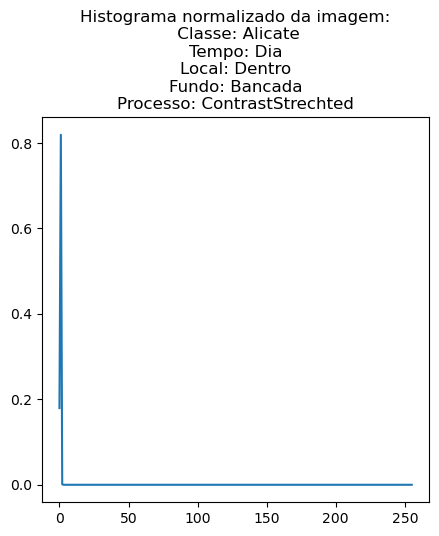

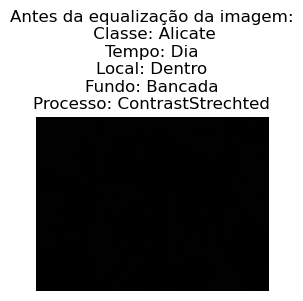

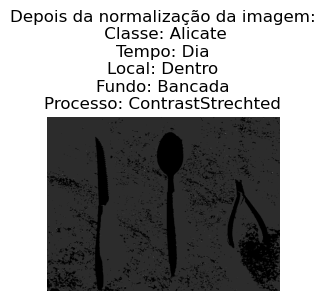

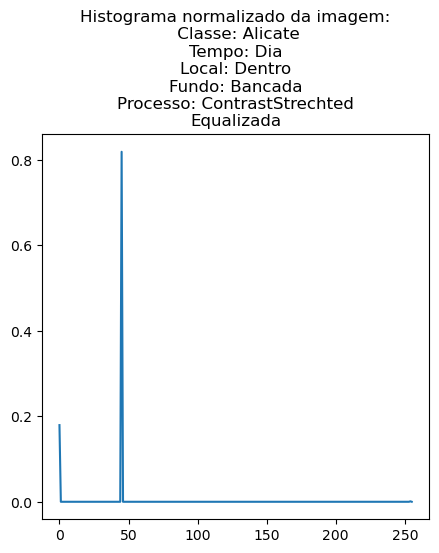

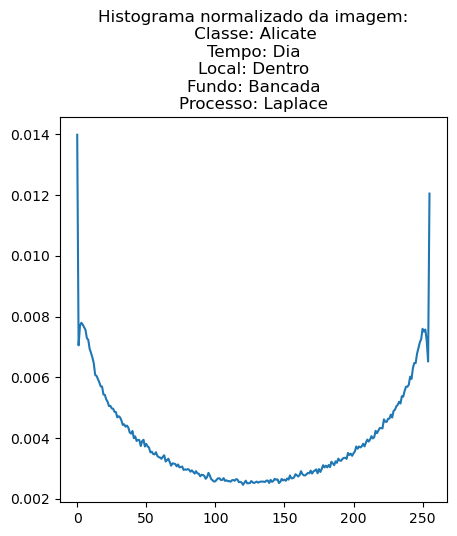

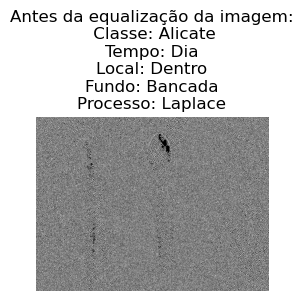

KeyboardInterrupt: 

In [70]:
def createNormalizedDataset(bancoImagens):
    if not os.path.exists("./normalizedDataset/"):
        os.makedirs("./normalizedDataset/")
    for classe in bancoImagens.keys():
        for tempo in bancoImagens[classe].keys():
            for iluminacao in bancoImagens[classe][tempo].keys():
                for fundo in bancoImagens[classe][tempo][iluminacao].keys():
                    for processo in bancoImagens[classe][tempo][iluminacao][fundo].keys():
                        legenda = f"Classe: {classe}\nTempo: {tempo}\nLocal: {iluminacao}\nFundo: {fundo}\nProcesso: {processo}"
                        normalizedValues = normalized_histogram(bancoImagens[classe][tempo][iluminacao][fundo][processo], legenda)
                        equalized_image = histogram_equalization(bancoImagens[classe][tempo][iluminacao][fundo][processo], normalizedValues, legenda)
                        normalized_histogram(equalized_image, legenda + "\nEqualizada");
                        saveImage(f"./normalizedDataset/{classe},{tempo},{iluminacao},{fundo},{processo},Equalizada.jpg", equalized_image)

createNormalizedDataset(bancoImagensProcessadas)

def normalizeOriginalGrayDataset(bancoImagens):
    for classe in bancoImagens.keys():
        for tempo in bancoImagens[classe].keys():
            for iluminacao in bancoImagens[classe][tempo].keys():
                for fundo in bancoImagens[classe][tempo][iluminacao].keys():
                    legenda = f"Classe: {classe}\nTempo: {tempo}\nLocal: {iluminacao}\nFundo: {fundo}"
                    normalizedValues = normalized_histogram(bancoImagens[classe][tempo][iluminacao][fundo], legenda)
                    equalized_image = histogram_equalization(bancoImagens[classe][tempo][iluminacao][fundo], normalizedValues, legenda)
                    normalized_histogram(equalized_image, legenda + "\nEqualizada");

normalizeOriginalGrayDataset(bancoImagensCinza)

## Comentários

Podemos notar que as imagens que passaram pelos processamentos tiveram, em geral, sua visibilidade melhorada consideravelmente. Em geral, tivemos os seguintes resultados para cada tipo de transformação:

 - Laplacianas: No caso as imagens Laplacianas não demonstram muita diferença visual devido sua natureza distribuida, porém em alguns casos podemos notar que a equalização resultou em um pouco de suavisação, ou remoção de "ruídos" mais fortes da imagem.
 - Filtro da média: As imagens que passaram pelo processo de blurring do filtro da média em geral apresentaram uma iluminação muito mais forte após serem equalizadas, independente da iluminação.
 - Constrast Stretching: As imagens mais escuras que passaram pelo constrast stretching tiveram as formas originais dos objetos realçadas.
 - Power Law: As imagens que passaram pela transformação Power Law também tiveram resultados similares as de Contrast Stretching.
 - Log Transform: As imagens que passaram pelo log transform tiveram seu constraste aumentado e os níveis de cinza mais distribuídos pelo processo da normalização.